In [2]:
ls

Untitled.ipynb  untitled.txt


In [5]:
pwd

'/notebooks'

In [8]:
import librosa

In [9]:
import audioread

In [40]:
import matplotlib
import numpy as np

In [106]:
audio, sr = librosa.load("Sisterhood/Taylor, Barbara mother daughter EDIT.WAV", sr=None)

In [28]:
import matplotlib.pyplot as plt

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [107]:
# Convert audio to a spectrogram
gram = np.log(librosa.feature.melspectrogram(audio, sr))

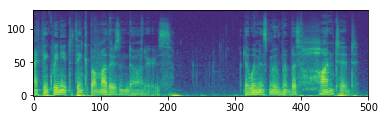

In [108]:
plt.imshow(gram[:, :500], origin='lower')

In [130]:
# Chop the spectrogram into chunks - arbitrarily chose about 1-sec size
segsize = 100
chunks = [gram[:, i*segsize:(i+1)*segsize] for i in range(int(gram.shape[1]/segsize))]

In [132]:
# Autocorrelation calculation. Unconventionally here we're calculating it for each frequency band separately
acorrs = [[np.correlate(row, row, mode='full') for row in chunk] for chunk in chunks]


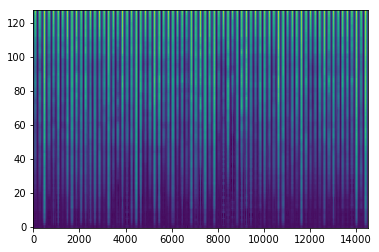

In [133]:
plt.imshow(np.hstack(acorrs), aspect='auto', origin='lower')

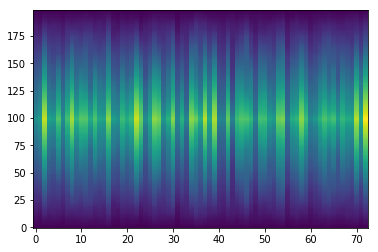

In [134]:
# ... in this plot I'll collapse the frequency axis
#  - now the vertical axis is the autocorrelation "lag", i.e. the rhythmic timescale
plt.imshow(np.vstack(np.sum(acorrs, axis=1, keepdims=True).T), aspect='auto', origin='lower')

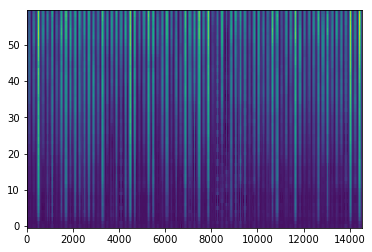

In [136]:
# Here let's just do that rhythm plot again,
# but drop the top-half i.e. the upper frequencies since they're less vocally informative
plt.imshow(np.hstack(acorrs)[:60, :], aspect='auto', origin='lower')